# ทำนายผลผลิตข้าวโพด โดยใช้ผลผลิตปีก่อน ๆ ด้วย Prophet

https://facebook.github.io/prophet/docs/quick_start.html

In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [2]:
yield_file = 'OAE-process/OAE-ผลผลิตข้าวโพดทั้งหมด.xlsx'

In [3]:
df = pd.read_excel(yield_file)
df = df.sort_values(by='date', ascending=False)
df

,date,product,key,area,lng,lat,value,unit,type,freq,level
308,2019-05-01,ข้าวโพด,ผลผลิตข้าวโพดทั้งหมด,Chiang Rai,19.899547,99.909809,6024,ตัน,volume,month,local
338,2019-05-01,ข้าวโพด,ผลผลิตข้าวโพดทั้งหมด,Buri Ram,15.034761,103.099667,0,ตัน,volume,month,local
331,2019-05-01,ข้าวโพด,ผลผลิตข้าวโพดทั้งหมด,Nakhon Phanom,17.384041,104.718385,0,ตัน,volume,month,local
332,2019-05-01,ข้าวโพด,ผลผลิตข้าวโพดทั้งหมด,Mukdahan,16.569237,16.569237,9,ตัน,volume,month,local
333,2019-05-01,ข้าวโพด,ผลผลิตข้าวโพดทั้งหมด,Yasothon,15.810120,104.147104,0,ตัน,volume,month,local
...,...,...,...,...,...,...,...,...,...,...,...
3209,2015-01-01,ข้าวโพด,ผลผลิตข้าวโพดทั้งหมด,Trat,12.250612,102.511843,0,ตัน,volume,month,local
3210,2015-01-01,ข้าวโพด,ผลผลิตข้าวโพดทั้งหมด,Rayong,12.714037,101.148290,0,ตัน,volume,month,local
3211,2015-01-01,ข้าวโพด,ผลผลิตข้าวโพดทั้งหมด,Chon Buri,13.365251,100.980242,0,ตัน,volume,month,local
3212,2015-01-01,ข้าวโพด,ผลผลิตข้าวโพดทั้งหมด,Samut Prakan,13.599757,100.596040,0,ตัน,volume,month,local


In [4]:
df.iloc[df.value.argmax(),:]

date        2015-11-01 00:00:00
product                 ข้าวโพด
key        ผลผลิตข้าวโพดทั้งหมด
area                        Nan
lng                     18.7995
lat                      100.78
value                    320066
unit                        ตัน
type                     volume
freq                      month
level                     local
Name: 3937, dtype: object

In [5]:
df_nan = df[df.area == 'Nan'].reset_index()
df_nan = df_nan[['date', 'value']]
df_nan.shape

(53, 2)

In [6]:
df_nan.columns = ['ds', 'y']
df_nan.head()

,ds,y
0,2019-05-01,6305
1,2019-04-01,12230
2,2019-03-01,4105
3,2019-02-01,8387
4,2019-01-01,30758


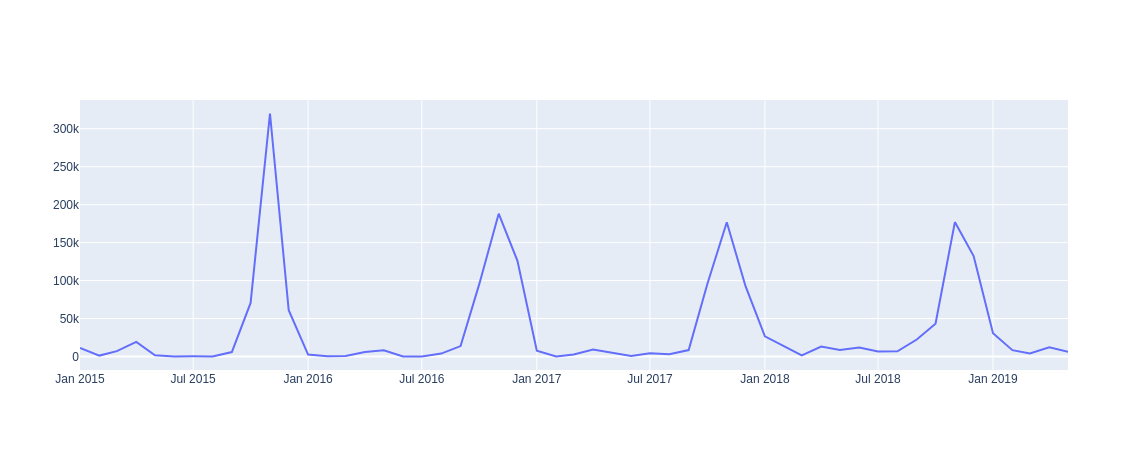

In [7]:
py.iplot([go.Scatter(x=df_nan['ds'], y=df_nan['y'], name='y')])

In [60]:
model = Prophet(weekly_seasonality=False, daily_seasonality=False, mcmc_samples=300, seasonality_prior_scale=0.05)
model.fit(df_nan)

In [61]:
future = model.make_future_dataframe(periods=12, freq="m")

In [62]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,37425.317558,-21888.578032,48571.992920,25407.284112,49621.724549,-23395.388686,-35656.255174,-10728.448450,-23395.388686,-35656.255174,-10728.448450,0.0,0.0,0.0,14029.928872
1,2015-02-01,37595.580928,-29240.158059,39971.330611,26732.071169,48718.602676,-32196.476997,-45016.073895,-19568.746198,-32196.476997,-45016.073895,-19568.746198,0.0,0.0,0.0,5399.103931
2,2015-03-01,37749.367198,-27666.712722,41256.167610,27485.152057,48090.378037,-31636.253027,-45551.761117,-18961.934498,-31636.253027,-45551.761117,-18961.934498,0.0,0.0,0.0,6113.114171
3,2015-04-01,37907.476648,-18536.339529,48633.389025,28431.387596,47340.848547,-22399.661023,-35536.177125,-8823.752435,-22399.661023,-35536.177125,-8823.752435,0.0,0.0,0.0,15507.815625
4,2015-05-01,38057.561851,-25833.588908,43229.178930,29336.663719,46357.495323,-29022.527266,-41612.360285,-16001.622565,-29022.527266,-41612.360285,-16001.622565,0.0,0.0,0.0,9035.034585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2019-12-31,39154.392517,-24295.932528,53760.638545,20863.131621,57005.675906,-25299.319036,-40262.136471,-9523.044100,-25299.319036,-40262.136471,-9523.044100,0.0,0.0,0.0,13855.073481
61,2020-01-31,39229.827159,-29513.213112,49313.048403,19913.687249,58036.278645,-29789.889835,-43397.375361,-16122.336314,-29789.889835,-43397.375361,-16122.336314,0.0,0.0,0.0,9439.937324
62,2020-02-29,39300.395050,-31568.212815,44841.174621,18974.626745,59357.980221,-30767.062117,-44573.807440,-17059.301278,-30767.062117,-44573.807440,-17059.301278,0.0,0.0,0.0,8533.332934
63,2020-03-31,39375.829693,-21389.447357,55621.486745,17821.218743,60413.700263,-21759.845580,-35196.958437,-7839.995385,-21759.845580,-35196.958437,-7839.995385,0.0,0.0,0.0,17615.984112


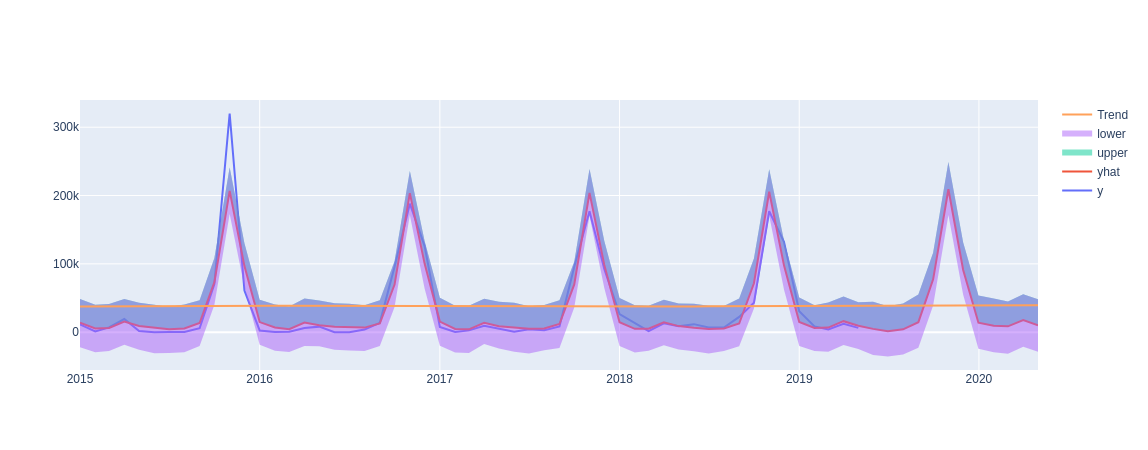

In [63]:
py.iplot([
    go.Scatter(x=df_nan['ds'], y=df_nan['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

In [64]:
# Calculate root mean squared error.
n = len(df_nan['y'])
print('RMSE: %f' % np.sqrt(np.mean((forecast.loc[:n-1, 'yhat']-df_nan['y'])**2)) )

RMSE: 94604.941166


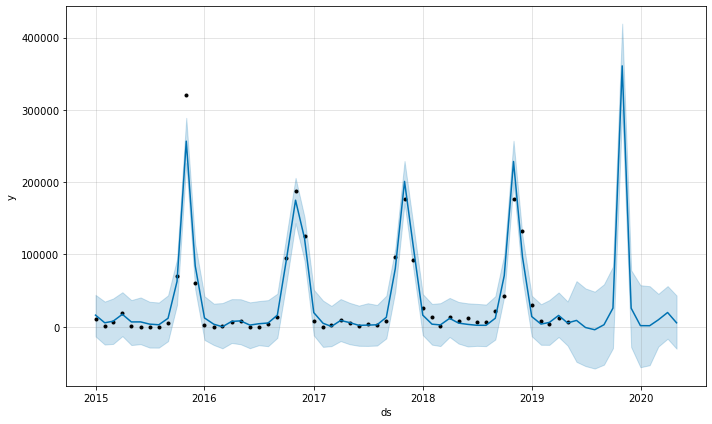

In [13]:
fig1 = model.plot(forecast)

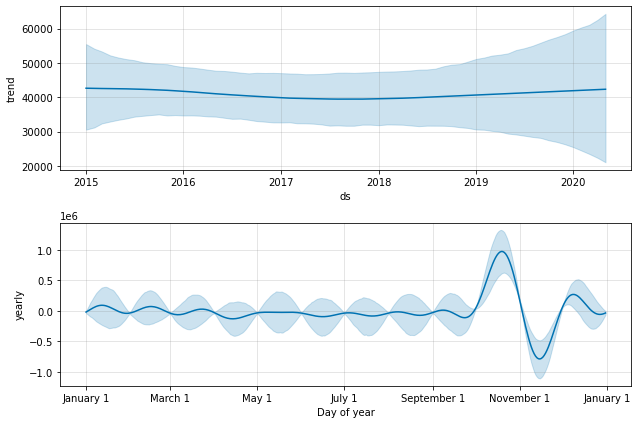

In [14]:
fig2 = model.plot_components(forecast)

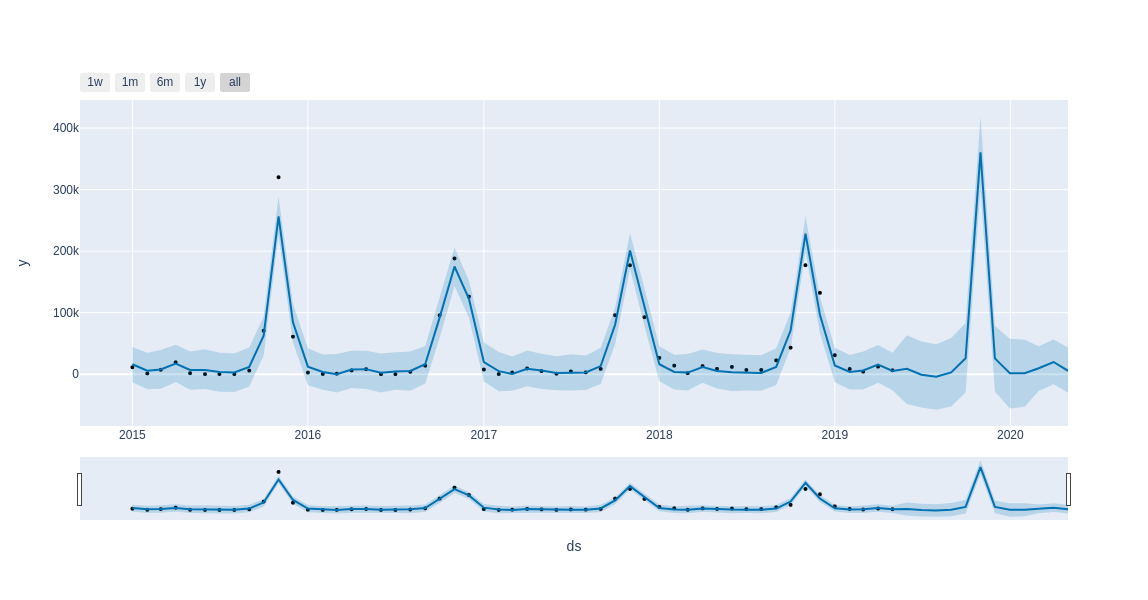

In [15]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)


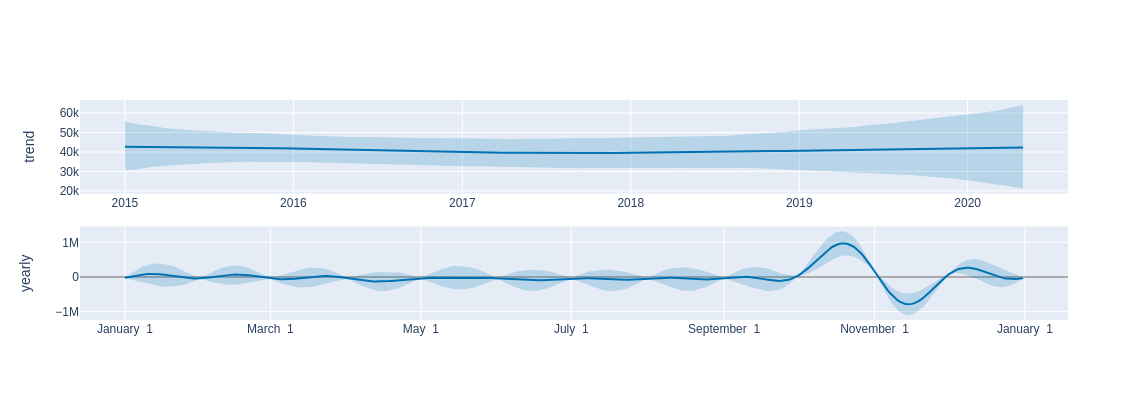

In [16]:
plot_components_plotly(model, forecast)

In [17]:
# Import the library 
from pmdarima import auto_arima 

  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df_nan['y'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=949.569, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=956.265, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=952.644, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=947.623, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=955.784, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=946.064, Time=0.03 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=947.571, Time=0.10 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=949.454, Time=0.36 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=948.014, Time=0.04 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=949.427, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=951.028, Time=0.01 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=949.838, Time=0.13 sec
 ARIMA(0,0,1)(0,1,0)[12]             : AIC=944.544, Time=0.03 sec
 ARIMA(0,0,1)(1,1,0)[12]             : AIC=946.421, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[12]         

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   53
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 12)   Log Likelihood                -470.272
Date:                             Wed, 30 Sep 2020   AIC                            944.544
Time:                                     09:31:49   BIC                            947.971
Sample:                                          0   HQIC                           945.792
                                              - 53                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5404      0.073     -7.408      0.000      -0.683      -0.397
sigma2      5.841e+08   5.85e-11   9.98e+18      0.000    5.84e+08    5.84e+08
===================================================================================
Ljung-Box (Q):                       25.39   Jarque-Bera (JB):                70.77
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.08   Skew:                             0.80
Prob(H) (two-sided):                  0.04   Kurtosis:                         9.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [18]:
start = len(df_nan) 
end = len(df_nan) + 12
  
# Predictions for one-year against the test set 
predictions = stepwise_fit.predict( end )
  


In [19]:
predictions.shape

(65,)

In [20]:
forecast['ds'].shape

(65,)

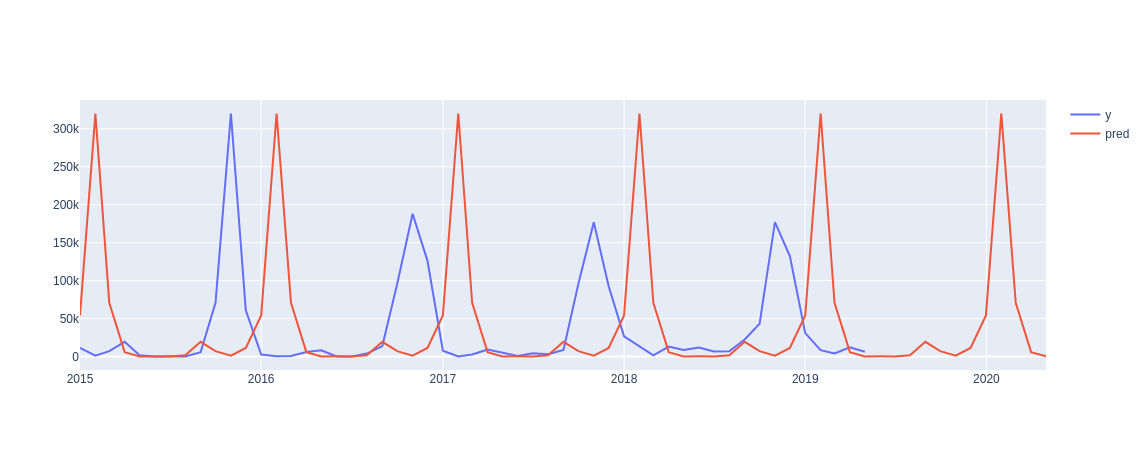

In [21]:
py.iplot([
    go.Scatter(x=df_nan['ds'], y=df_nan['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=predictions, name='pred')
])

In [22]:
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(df_nan['y'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 

/home/yoyo/anaconda3/envs/oae/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/home/yoyo/anaconda3/envs/oae/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.

/home/yoyo/anaconda3/envs/oae/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   53
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -467.095
Date:                            Wed, 30 Sep 2020   AIC                            944.190
Time:                                    09:31:49   BIC                            952.635
Sample:                                         0   HQIC                           947.243
                                             - 53                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8420      0.152     -5.535      0.000      -1.140      -0.544
ar.S.L12       0.5791      0.652      0.888      0.375      -0.699       1.857
ar.S.L24       0.3217      0.187      1.725      0.085      -0.044       0.687
ma.S.L12      -0.7806      0.782     -0.999      0.318      -2.313       0.752
sigma2       9.63e+08   1.36e-09   7.11e+17      0.000    9.63e+08    9.63e+08
===================================================================================
Ljung-Box (Q):                       25.37   Jarque-Bera (JB):               162.66
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               3.11   Skew:                             2.03
Prob(H) (two-sided):                  0.05   Kurtosis:                        12.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.1e+33. Standard errors may be unstable.
"""

<AxesSubplot:>

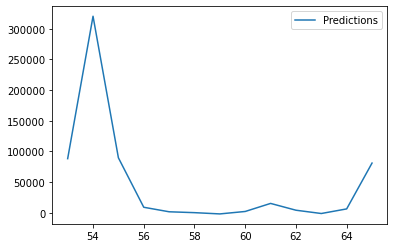

In [23]:
start = len(df_nan) 
end = 65
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
# test['#Passengers'].plot(legend = True) 

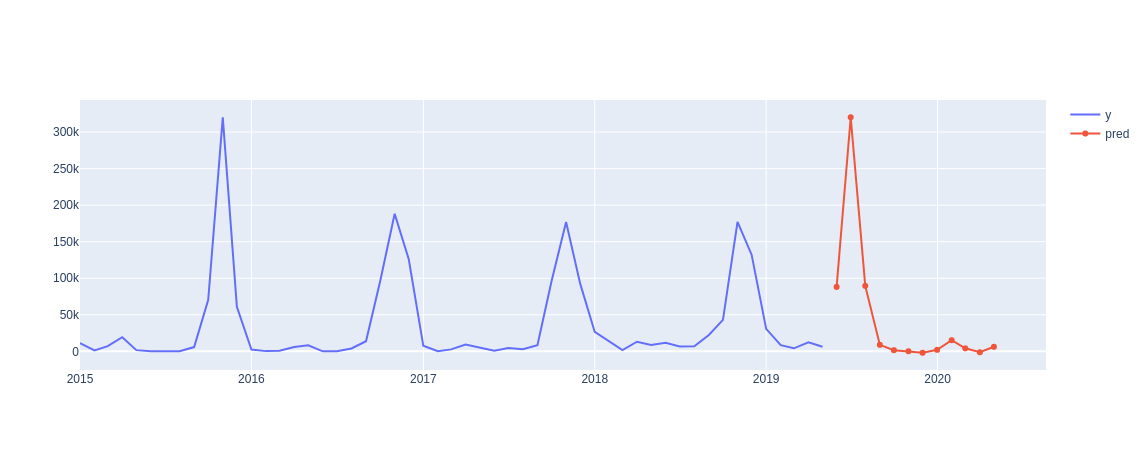

In [24]:
py.iplot([
    go.Scatter(x=df_nan['ds'], y=df_nan['y'], name='y'),
    go.Scatter(x=forecast['ds'][-12:,], y=predictions, name='pred')
])

In [1]:
import numpy as np
from sktime.datasets import load_airline
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss

y = load_airline()
y_train, y_test = temporal_train_test_split(y)
fh = np.arange(1, len(y_test) + 1)  # forecasting horizon
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
smape_loss(y_test, y_pred)

/home/yoyo/anaconda3/envs/oae/lib/python3.8/site-packages/sktime/forecasting/exp_smoothing.py:94: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  self._forecaster = _ExponentialSmoothing(
/home/yoyo/anaconda3/envs/oae/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/yoyo/anaconda3/envs/oae/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
/home/yoyo/anaconda3/envs/oae/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1132: FutureWarning: use_basinhopping is deprecated. Set optimization method using 'method'. This option will be removed after 0.13 is released.
  warnings.warn(


0.08661466717597058